In [8]:
import pandas as pd

In [9]:
# 学習データをダウンロードする
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
savepath = "winequality-red.csv"
urlretrieve(url, savepath)

('winequality-red.csv', <http.client.HTTPMessage at 0x7fc3c313f880>)

In [10]:
# デリミタが「;」を指定してdfに入れる
df = pd.read_csv("winequality-red.csv",sep=";",header=0)

In [81]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
# 品質値対応表
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# quality列を0-5の数値に変換する
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [84]:
# データをシャッフル
df = df.sample(frac=1).reset_index(drop=True)

# 学習用データ
df_train = df.head(1000)

# 評価用データ
df_test = df.tail(599)

In [27]:
from sklearn import tree
from sklearn import metrics

In [94]:
# 決定木分類器の初期化
# 深さは3
def Calcclf(max_depth: int):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)

    #学習の特徴量を指定
    cols = ['fixed acidity',
     'volatile acidity',
     'citric acid',
     'residual sugar',
     'chlorides',
     'free sulfur dioxide',
     'total sulfur dioxide',
     'density',
     'pH',
     'sulphates',
     'alcohol']

    # モデル学習
    clf.fit(df_train[cols], df_train.quality)
    # prediction for train dataset
    
    train_predictions = clf.predict(df_train[cols])

    # accuracy of train prediction
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    print(train_accuracy)


    # predintion for test dataset
    test_predictions = clf.predict(df_test[cols])

    # accuracy of test prediction
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    print(test_accuracy)
    
    return [train_accuracy, test_accuracy]


In [96]:
Calcclf(3)[0]

0.588
0.5592654424040067


0.588

In [90]:
# prediction for train dataset
train_predictions = clf.predict(df_train[cols])

# accuracy of train prediction
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
print(train_accuracy)


# predintion for test dataset
test_predictions = clf.predict(df_test[cols])

# accuracy of test prediction
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(test_accuracy)


0.588
0.5592654424040067


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

# 正答率の保存用リスト
train_accuracy = [0.5]
test_accuracy = [0.5]

# max_depthを変えて検証
for max_depth in range(1, 25):
    resultlist=Calcclf(max_depth)
    train_accuracy.append(resultlist[0])
    test_accuracy.append(resultlist[1])


NameError: name 'Calcclf' is not defined

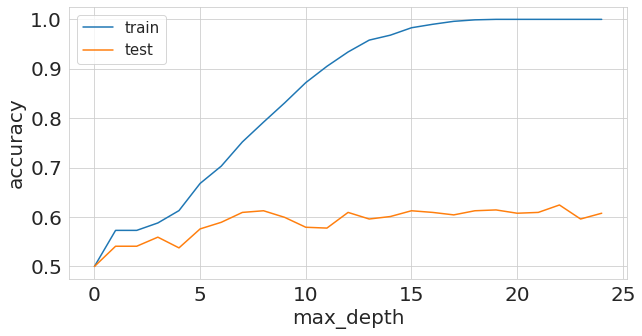

In [109]:
# 可視化
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

Text(0, 0.5, 'count')

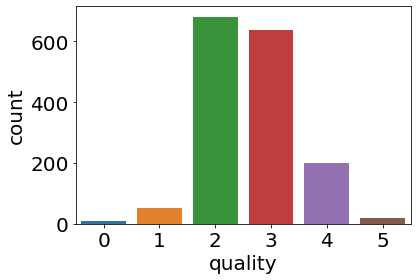

In [13]:
# 目的変数の分布
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)